<a href="https://colab.research.google.com/github/Michael-Stout/UCB-ML-AI/blob/main/17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Replace with the actual URL of your CSV file
#url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vS_2wRAPeKnEIovix07WvZwWPLtyG_7rRs0QApBwWrTDFg64hOnshO1cjXREGkjoo-fqezbNON9mrMQ/pub?gid=1151578262&single=true&output=csv'
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQ7BdnWaEIfcFkTk5nJv4NUPm4kBKsTP15kC3SYyFbvWiYfKRsLbIm6O_ur0DIOll79_D8wMlv_bONp/pub?gid=713584714&single=true&output=csv'
# Read the CSV file into a pandas DataFrame
df = pd.read_csv(url)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
# prompt: check for missing values, if there are missing values, then display the feature, otherwise report no missing values

# Check for missing values
missing_values = df.isnull().sum()

# Display features with missing values
if missing_values.sum() > 0:
  print("Features with missing values:")
  print(missing_values[missing_values > 0])
else:
  print("No missing values found in the DataFrame.")

No missing values found in the DataFrame.


In [ ]:
# Numeric Statistics
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
# prompt: class imbalances

import pandas as pd

# Assuming 'target_variable' is the column representing your target class
target_variable = 'y'  # Replace with your actual target variable column name

if target_variable in df.columns:
    class_counts = df[target_variable].value_counts()
    print("\nClass Distribution:")
    print(class_counts)

    # Calculate the percentage of each class
    class_percentages = (class_counts / len(df)) * 100
    print("\nClass Percentages:")
    print(class_percentages)

    # Identify potential class imbalances
    if len(class_counts) > 1:
        max_class_percentage = class_percentages.max()
        min_class_percentage = class_percentages.min()
        if max_class_percentage > (min_class_percentage * 2):  # Arbitrary threshold, adjust as needed
            print("\nPotential class imbalance detected.")
            print(
                "The majority class comprises a significantly larger proportion of the dataset than the minority class."
            )
else:
    print("Target variable column not found in the DataFrame.")



Class Distribution:
y
no     3668
yes     451
Name: count, dtype: int64

Class Percentages:
y
no     89.05074
yes    10.94926
Name: count, dtype: float64

Potential class imbalance detected.
The majority class comprises a significantly larger proportion of the dataset than the minority class.


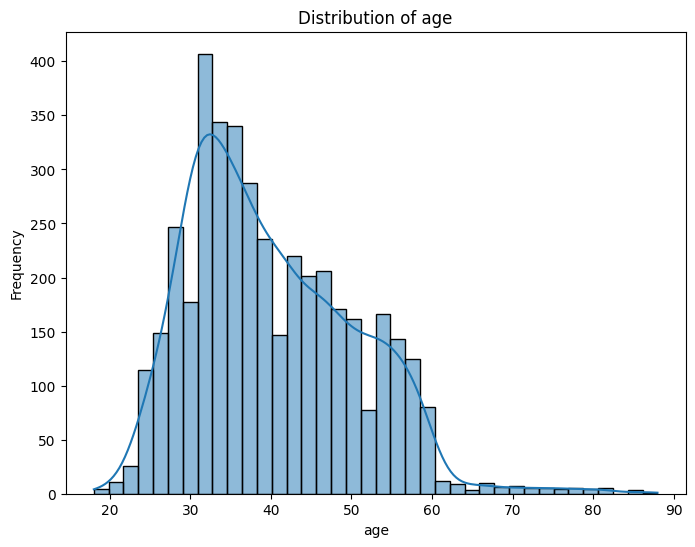

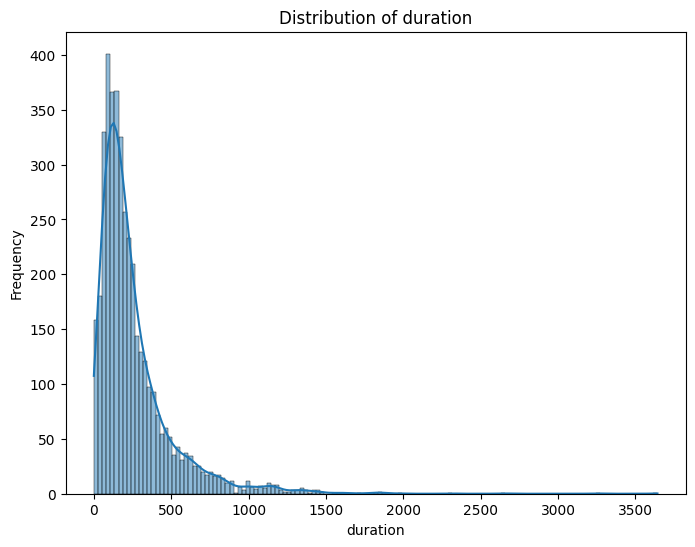

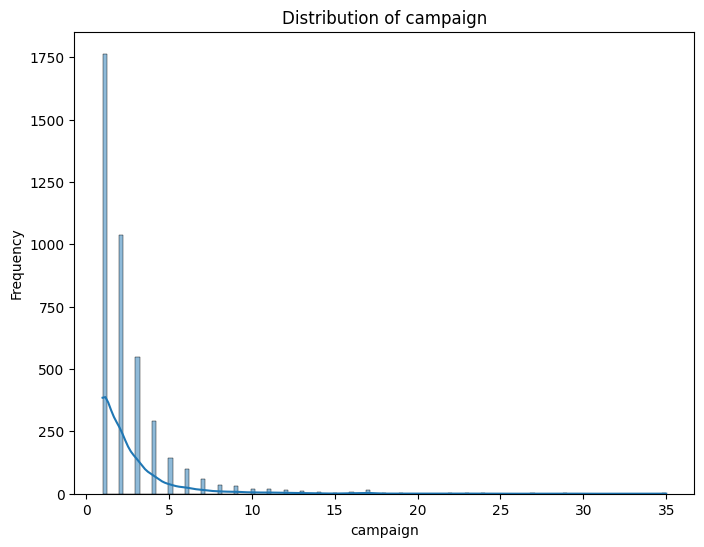

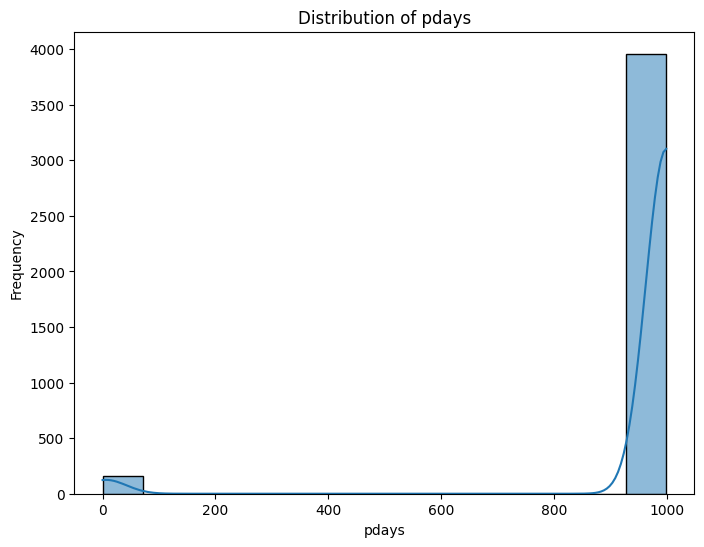

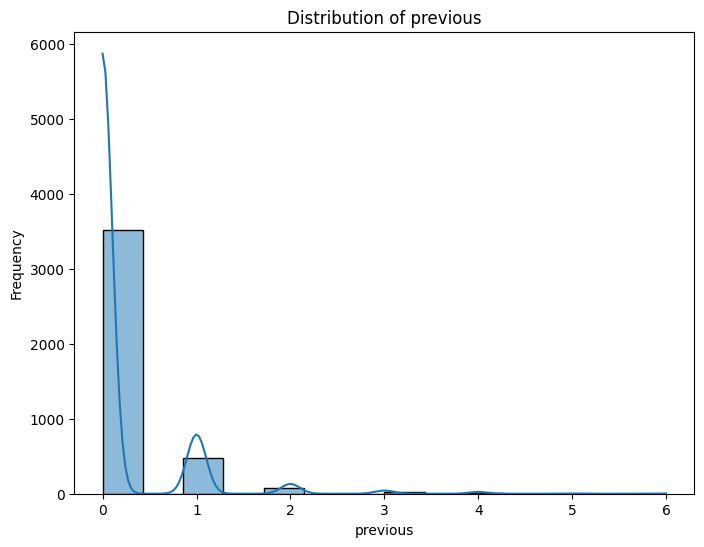

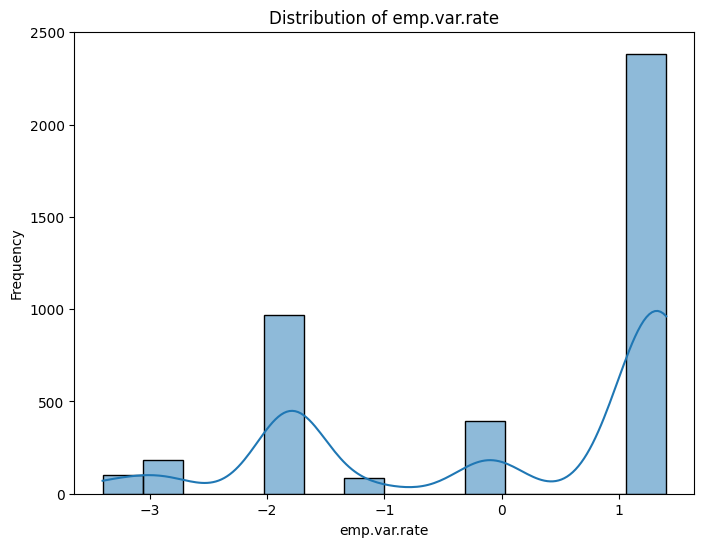

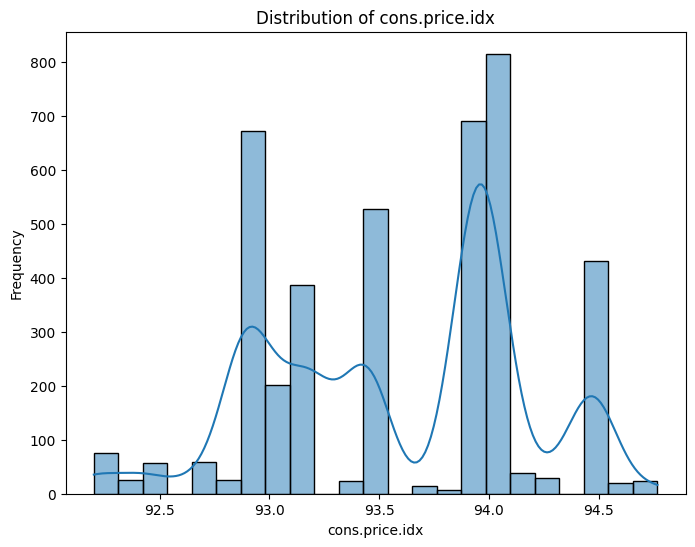

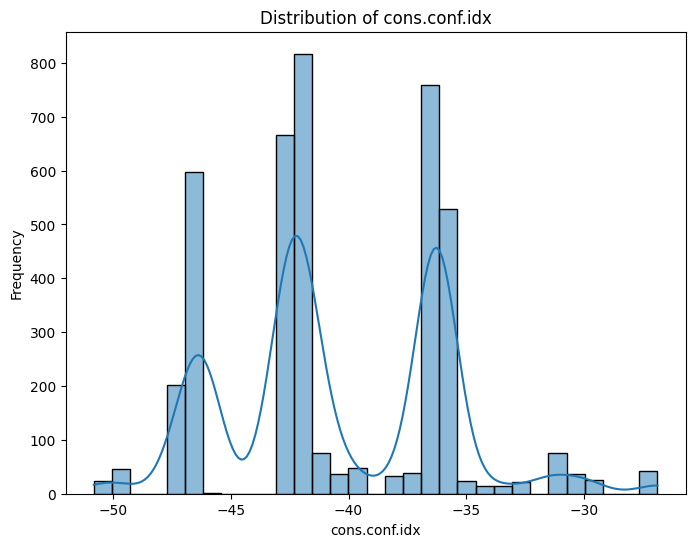

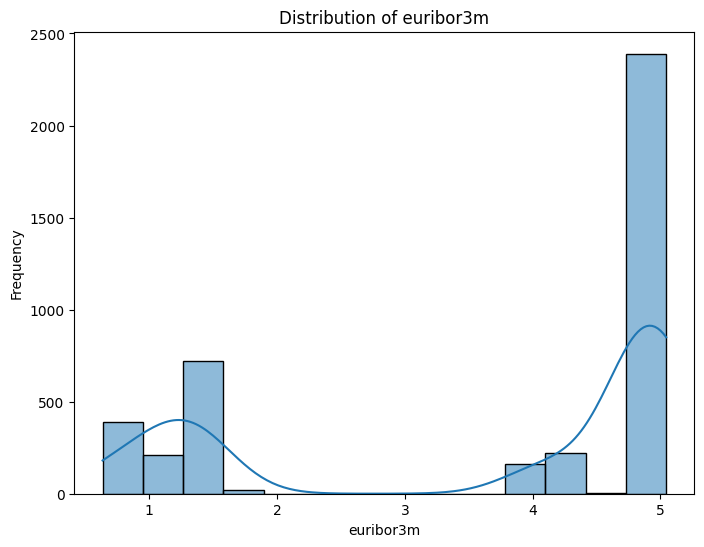

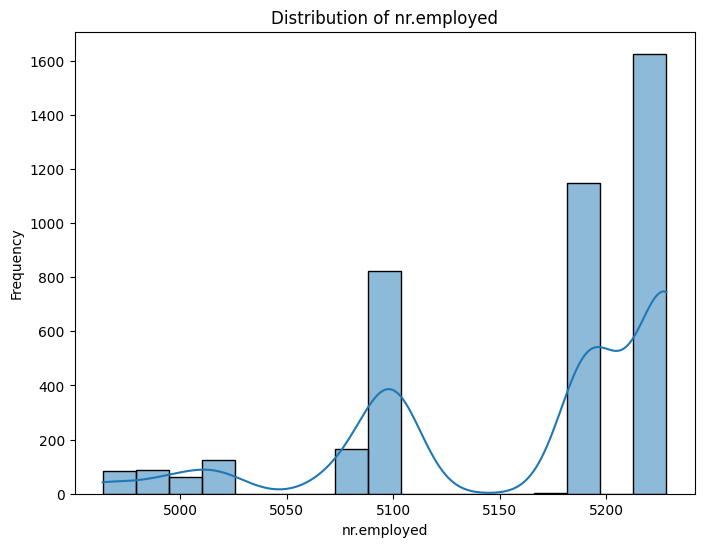

In [ ]:
# prompt: Univariate Distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Loop through numerical features and plot their distributions
for column in df.select_dtypes(include=['number']):
  plt.figure(figsize=(8, 6))
  sns.histplot(df[column], kde=True)
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()


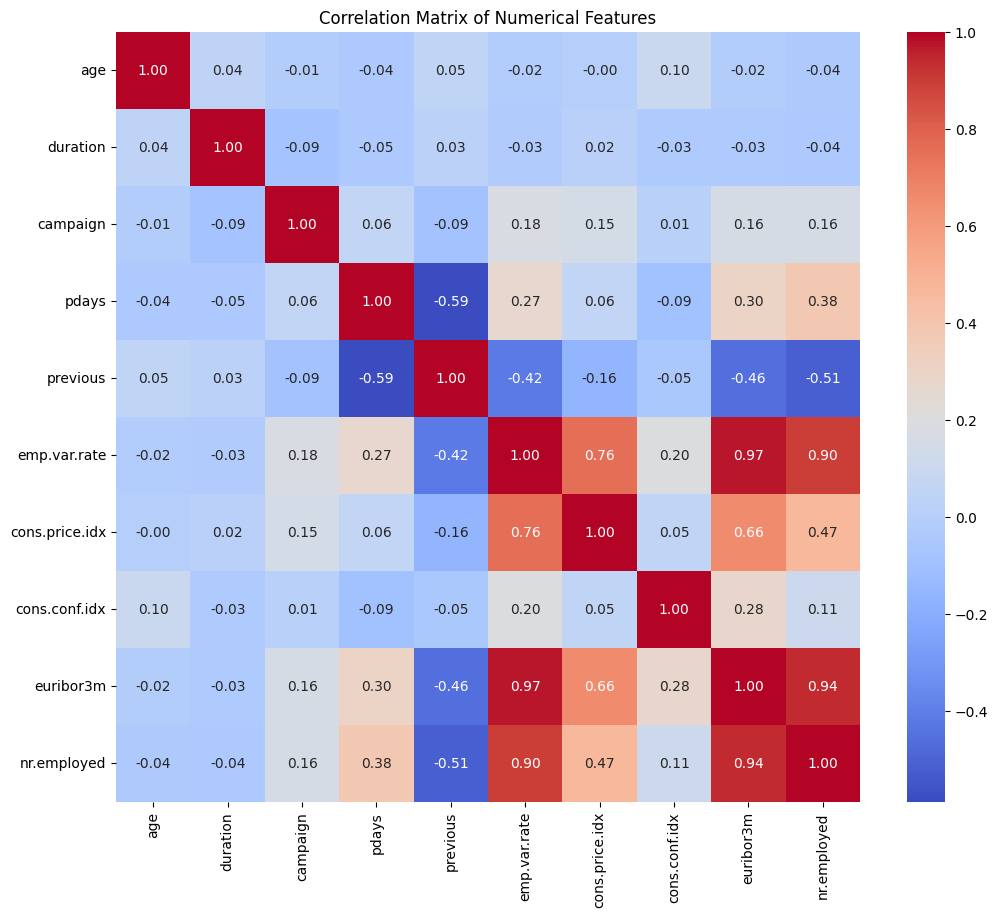

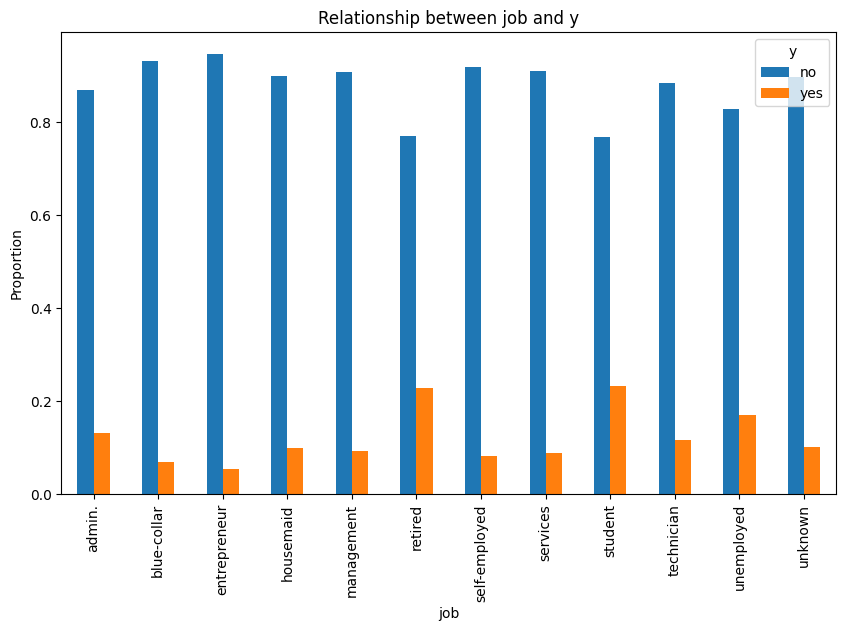

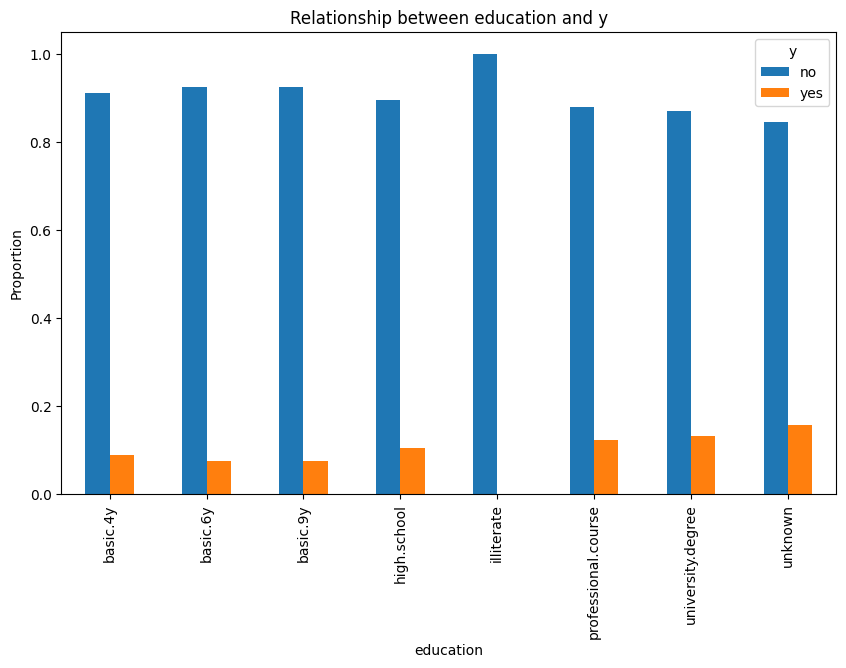

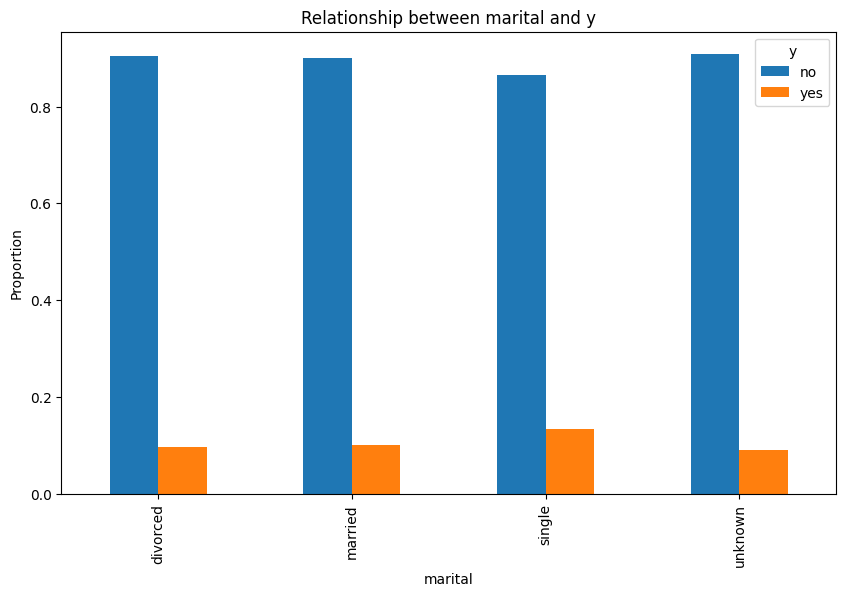

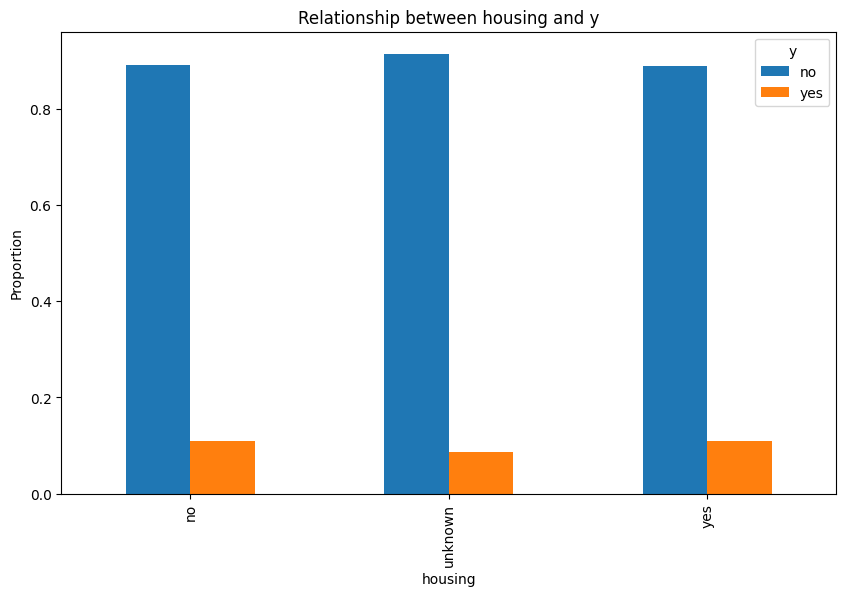

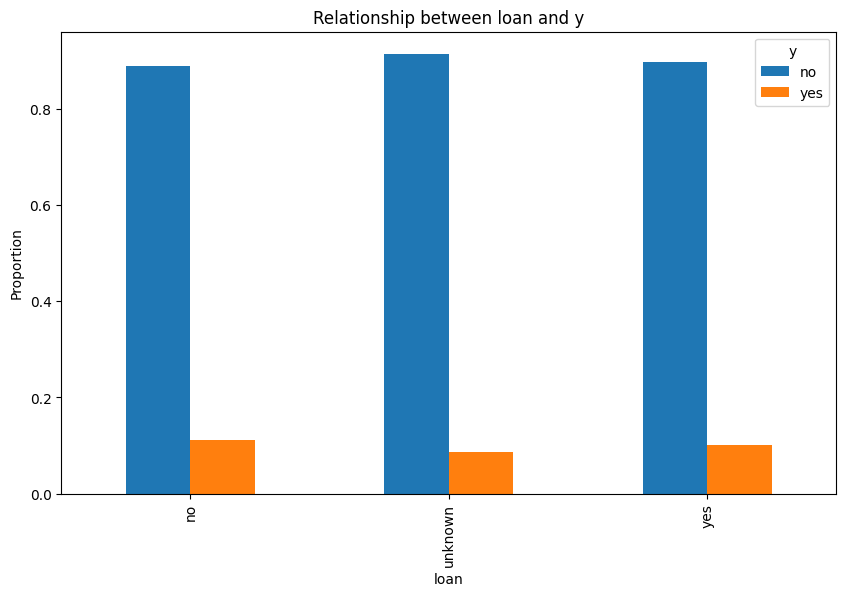

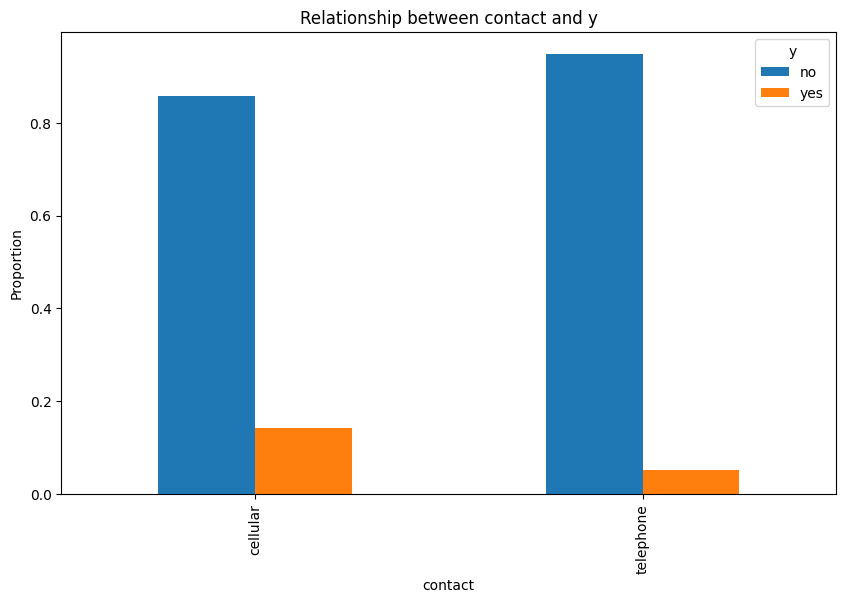

In [ ]:
# prompt: Multivariate Relationships

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas if it hasn't been already

# Correlation Matrix - Only include numerical features
numerical_df = df.select_dtypes(include=['number']) # Select only numerical features for correlation
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

selected_features = ['job', 'education', 'marital', 'housing', 'loan', 'contact']
target_variable = 'y'  # Assuming 'y' is your target variable column name

# Function to create a grouped bar chart for a categorical feature against the target variable
def plot_categorical_against_target(df, feature, target):
    """Creates a grouped bar chart comparing a categorical feature against the target variable.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        feature (str): The name of the categorical feature.
        target (str): The name of the target variable column.
    """
    cross_tab = pd.crosstab(df[feature], df[target], normalize='index')
    cross_tab.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Relationship between {feature} and {target}')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.legend(title=target)
    plt.show()

# Iterate through selected features and plot their relationships with the target variable
for feature in selected_features:
    plot_categorical_against_target(df, feature, target_variable)

In [ ]:
# prompt: # Separate majority and minority classes

from sklearn.model_selection import train_test_split

# Separate majority and minority classes
if target_variable in df.columns:
    df_majority = df[df[target_variable] == 'no']
    df_minority = df[df[target_variable] == 'yes']

    print(f"Majority class shape: {df_majority.shape}")
    print(f"Minority class shape: {df_minority.shape}")
else:
    print("Target variable column not found in the DataFrame.")


Majority class shape: (3668, 21)
Minority class shape: (451, 21)


In [ ]:
# prompt: # Upsample minority class

from sklearn.utils import resample

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print("Class distribution after upsampling:")
print(df_upsampled[target_variable].value_counts())


Class distribution after upsampling:
y
no     3668
yes    3668
Name: count, dtype: int64


In [ ]:
# prompt: # Combine majority class with upsampled minority class

df_upsampled = pd.concat([df_majority, df_minority_upsampled])


In [ ]:
# prompt: # Separate features and target variable again after resampling

X_upsampled = df_upsampled.drop(target_variable, axis=1)
y_upsampled = df_upsampled[target_variable]


In [ ]:
# prompt: # Encode categorical variables and scale numeric features

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical and numerical features
categorical_features = X_upsampled.select_dtypes(include=['object']).columns
numerical_features = X_upsampled.select_dtypes(include=['number']).columns

# Create a column transformer to apply different preprocessing steps to different features
transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Fit and transform the data using the column transformer
X_transformed = transformer.fit_transform(X_upsampled)


In [ ]:
# prompt: # Define preprocessing steps

# Define preprocessing steps
def preprocess_data(df, target_variable):
  """Preprocesses the input DataFrame by handling class imbalance,
     encoding categorical features, and scaling numerical features.

  Args:
      df (pd.DataFrame): The DataFrame containing the data.
      target_variable (str): The name of the target variable column.

  Returns:
      tuple: A tuple containing the preprocessed feature matrix (X) and
             target vector (y).
  """

  # Separate majority and minority classes
  df_majority = df[df[target_variable] == 'no']
  df_minority = df[df[target_variable] == 'yes']

  # Upsample minority class
  df_minority_upsampled = resample(df_minority,
                                   replace=True,
                                   n_samples=len(df_majority),
                                   random_state=42)

  # Combine majority class with upsampled minority class
  df_upsampled = pd.concat([df_majority, df_minority_upsampled])

  X_upsampled = df_upsampled.drop(target_variable, axis=1)
  y_upsampled = df_upsampled[target_variable]

  # Identify categorical and numerical features
  categorical_features = X_upsampled.select_dtypes(include=['object']).columns
  numerical_features = X_upsampled.select_dtypes(include=['number']).columns

  # Create a column transformer to apply different preprocessing steps to different features
  transformer = ColumnTransformer(
      transformers=[
          ('num', StandardScaler(), numerical_features),
          ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
      ])

  # Fit and transform the data using the column transformer
  X_transformed = transformer.fit_transform(X_upsampled)

  return X_transformed, y_upsampled


In [ ]:
# prompt: # Fit and transform the data

X_preprocessed, y_preprocessed = preprocess_data(df, target_variable)

# Now you can use X_preprocessed and y_preprocessed for your machine learning model.


In [ ]:
# prompt: # Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y_preprocessed, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((5868, 63), (1468, 63))

In [ ]:
import time
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize Dummy Classifier (using most frequent strategy)
dummy_clf = DummyClassifier(strategy="most_frequent")

# Train Dummy Classifier
start_time = time.time()  # Record the start time
dummy_clf.fit(X_train, y_train)
training_time = time.time() - start_time  # Calculate the training time

# Predict using Dummy Classifier
start_time = time.time()  # Record the start time for prediction
y_pred = dummy_clf.predict(X_test)  # Make predictions on the test set
prediction_time = time.time() - start_time  # Calculate the prediction time


# Calculate metrics
# Print classification report with zero_division parameter
print(f"Dummy Classifier")
print(f"Training Time: {training_time:.4f} seconds")
print(f"Prediction Time: {prediction_time:.4f} seconds")
print(f"\n{classification_report(y_test, y_pred, zero_division=1)}")

# Display ROC-AUC score
y_pred_proba = dummy_clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

Dummy Classifier
Training Time: 0.0041 seconds
Prediction Time: 0.0003 seconds

              precision    recall  f1-score   support

          no       1.00      0.00      0.00       735
         yes       0.50      1.00      0.67       733

    accuracy                           0.50      1468
   macro avg       0.75      0.50      0.33      1468
weighted avg       0.75      0.50      0.33      1468

ROC-AUC Score: 0.5


In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score

# Create a dictionary to store the models
models = {
        "K-Nearest Neighbors Model": KNeighborsClassifier(),
        "Logistic Regression Model": LogisticRegression(),
        "Decision Tree Model": DecisionTreeClassifier(),
        "Random Forest Model": RandomForestClassifier(),
        "Support Vector Machine Model": SVC(),
}

# Iterate through the models and evaluate them
for model_name, model in models.items():
  print(f"\n{model_name}")

  # Calculate the training and prediction time
  start_time = time.time()  # Record the start time
  model.fit(X_train, y_train)  # Train the model
  end_time = time.time()  # Record the end time
  training_time = end_time - start_time  # Calculate the training time

  start_time = time.time()  # Record the start time for prediction
  y_pred = model.predict(X_test)  # Make predictions on the test set
  end_time = time.time()  # Record the end time for prediction
  prediction_time = end_time - start_time  # Calculate the prediction time


  # Display the classification report
  print(f"Training Time: {training_time:.4f} seconds")
  print(f"Prediction Time: {prediction_time:.4f} seconds")
  print(f"\n{classification_report(y_test, y_pred)}")

  # Display ROC-AUC score
  y_pred_proba = dummy_clf.predict_proba(X_test)[:, 1]
  roc_auc = roc_auc_score(y_test, y_pred_proba)
  print(f"ROC-AUC Score: {roc_auc}")


K-Nearest Neighbors Model
Training Time: 0.0051 seconds
Prediction Time: 0.0309 seconds

              precision    recall  f1-score   support

          no       0.97      0.84      0.90       735
         yes       0.86      0.98      0.92       733

    accuracy                           0.91      1468
   macro avg       0.92      0.91      0.91      1468
weighted avg       0.92      0.91      0.91      1468

ROC-AUC Score: 0.5

Logistic Regression Model
Training Time: 0.0468 seconds
Prediction Time: 0.0004 seconds

              precision    recall  f1-score   support

          no       0.88      0.87      0.87       735
         yes       0.87      0.88      0.87       733

    accuracy                           0.87      1468
   macro avg       0.87      0.87      0.87      1468
weighted avg       0.87      0.87      0.87      1468

ROC-AUC Score: 0.5

Decision Tree Model
Training Time: 0.0457 seconds
Prediction Time: 0.0007 seconds

              precision    recall  f1-score 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline  # Import Pipeline for combining steps
from sklearn.preprocessing import StandardScaler  # Import StandardScaler


# Define a pipeline with scaling and KNN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale numerical features before KNN
    ('knn', KNeighborsClassifier())
])

# Define parameter grid for KNN (including scaling parameters if needed)
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],  # Explore a wider range of neighbors
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV with the pipeline and parameter grid
grid_search_knn = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid_knn,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

# Fit the GridSearchCV object to the training data
grid_search_knn.fit(X_train, y_train)

# Get the best KNN model and its performance
best_knn_model = grid_search_knn.best_estimator_
best_knn_params = grid_search_knn.best_params_
best_knn_score = grid_search_knn.best_score_

print(f"Best KNN parameters: {best_knn_params}")
print(f"Best KNN score: {best_knn_score}")

Best KNN parameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'distance'}
Best KNN score: 0.9229715736379731


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.90848753 0.92058569 0.86520214 0.89877308 0.83265466 0.88394701
 0.81408044 0.88173207 0.80470655 0.89110393        nan 0.92297157
        nan 0.90269188        nan 0.88837719        nan 0.88428831
        nan 0.89331988]
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grids for each model
param_grids = {
    "K-Nearest Neighbors Model": {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean']
    },
    "Logistic Regression Model": {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    "Decision Tree Model": {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest Model": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Support Vector Machine Model": {
        #'C': [0.1, 1, 10],
        #'kernel': ['linear', 'rbf'],
        #'gamma': ['scale', 'auto', 0.1, 1]
        'C': [0.1, 1, 10, 100],
        'gamma': [1, 0.1, 0.01, 0.001],
        'kernel': ['rbf', 'linear']

    }
}

# Initialize models
models = {
    "K-Nearest Neighbors Model": KNeighborsClassifier(),
    "Logistic Regression Model": LogisticRegression(max_iter=1000, random_state=42),  # Adjust max_iter 10K? if needed
    "Decision Tree Model": DecisionTreeClassifier(random_state=42),
    "Random Forest Model": RandomForestClassifier(random_state=42),
    "Support Vector Machine Model": SVC(random_state=42, probability=True)
}

# Perform Grid Search for each model
for model_name, model in models.items():
    print(f"{model_name} Grid Search")

    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)  # Assuming X_train and y_train are defined

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {grid_search.best_score_}\n")

K-Nearest Neighbors Model Grid Search
Best parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best score: 0.9335369493327292

Logistic Regression Model Grid Search
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.8735517049572218

Decision Tree Model Grid Search
Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9599527122900119

Random Forest Model Grid Search
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.9660874793588274

Support Vector Machine Model Grid Search
Best parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best score: 0.9945469544013443



In [ ]:
# prompt: fit models with resampled training data

# Fit models with resampled training data
for model_name, model in models.items():
    print(f"\n{model_name} with Resampled Data")

    # Fit the model to the resampled training data
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_time = end_time - start_time

    # Make predictions on the test set
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    prediction_time = end_time - start_time

    # Evaluate the model
    print(f"Training Time: {training_time:.4f} seconds")
    print(f"Prediction Time: {prediction_time:.4f} seconds")
    print(f"\n{classification_report(y_test, y_pred)}")

    # Calculate and print ROC-AUC score
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    if y_pred_proba is not None:
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"ROC-AUC Score: {roc_auc}")



K-Nearest Neighbors Model with Resampled Data
Training Time: 0.0049 seconds
Prediction Time: 0.1510 seconds

              precision    recall  f1-score   support

          no       0.97      0.84      0.90       735
         yes       0.86      0.98      0.92       733

    accuracy                           0.91      1468
   macro avg       0.92      0.91      0.91      1468
weighted avg       0.92      0.91      0.91      1468

ROC-AUC Score: 0.9631864205436609

Logistic Regression Model with Resampled Data
Training Time: 0.0483 seconds
Prediction Time: 0.0028 seconds

              precision    recall  f1-score   support

          no       0.88      0.87      0.87       735
         yes       0.87      0.88      0.87       733

    accuracy                           0.87      1468
   macro avg       0.87      0.87      0.87      1468
weighted avg       0.87      0.87      0.87      1468

ROC-AUC Score: 0.938302196731353

Decision Tree Model with Resampled Data
Training Time: 0.0

In [ ]:
# prompt: next steps?

# Based on the model evaluation results, you can consider the following next steps:

# 1. Hyperparameter Tuning:
#    - For the best-performing model (e.g., Random Forest, Logistic Regression),
#      tune its hyperparameters using techniques like Grid Search or Randomized Search.
#      This helps to optimize the model's performance further.

# 2. Feature Engineering:
#    - Analyze the features and see if you can create new features that might
#      improve the model's ability to learn patterns and predict the target
#      variable. Feature engineering can significantly impact the model's
#      performance.

# 3. Feature Selection:
#    - Determine the most important features for your model. You can use techniques
#      like feature importance scores from tree-based models or recursive
#      feature elimination. This can help to reduce model complexity and improve
#      its performance.

# 4. Model Ensembling:
#    - Combine multiple models (e.g., Random Forest, Logistic Regression)
#      to create an ensemble model that performs better than any individual model.
#      Techniques like bagging and boosting can be used to create ensemble models.

# 5. Cross-Validation:
#    - Evaluate the model's performance using cross-validation to ensure that the
#      results are robust and not overfitting to the training data.

# 6. Model Deployment:
#    - Once you are satisfied with the model's performance, you can deploy it
#      to make predictions on new data. This could involve creating a web
#      application or integrating the model into an existing system.

# 7. Error Analysis:
#    - Analyze the model's predictions on the test set to understand where it is
#      making mistakes. This can help you identify areas where the model can be
#      improved further.


# Example of hyperparameter tuning for Random Forest:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5)

grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
print(f"Best Random Forest model parameters: {grid_search.best_params_}")

# You can then evaluate the best model on the test set and compare its
# performance with the previous models.

# Remember to adapt these steps and techniques based on your specific
# dataset and business goals.


KeyboardInterrupt: 